In [1]:
import numpy as np
import sys
import os
import argparse
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import scipy.stats

# # latex rendering
# mpl.rcParams['text.usetex'] = True

plt.rcParams['font.size'] = 17.5
plt.rcParams['axes.labelsize'] = 17.5
plt.rcParams['xtick.labelsize'] = 17.5
plt.rcParams['ytick.labelsize'] = 17.5
plt.rcParams['legend.fontsize'] = 17.5

/tmp/ipykernel_2156789/2619260487.py:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect to make space for the legend


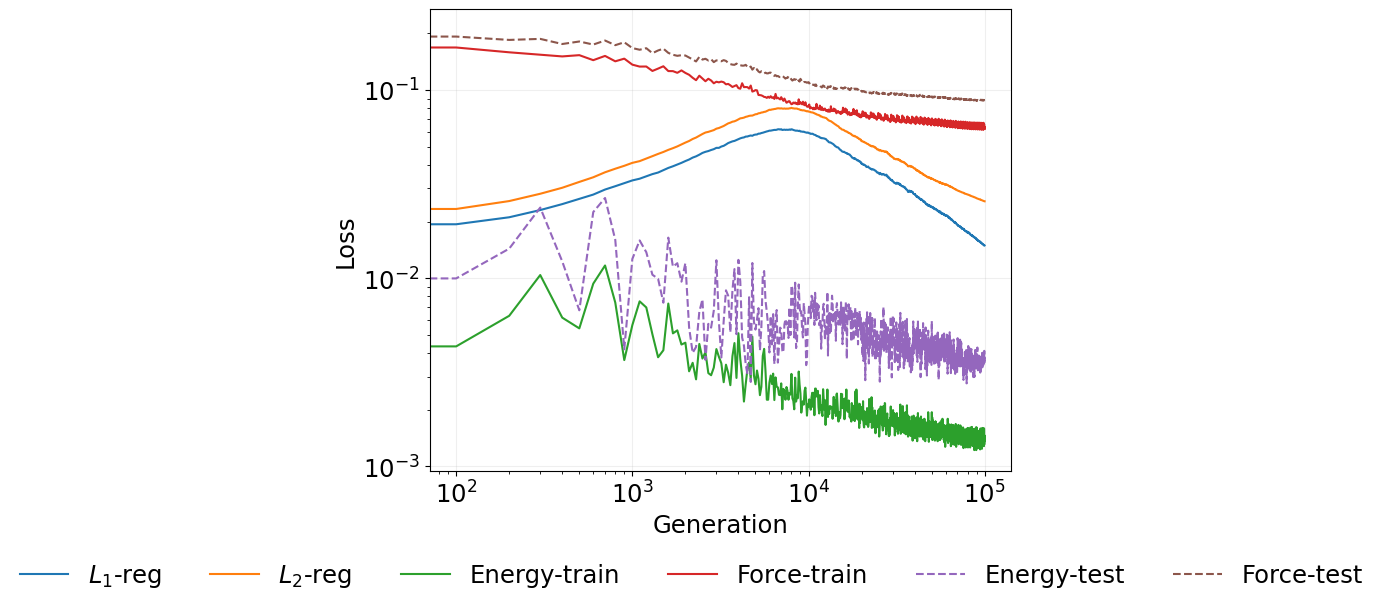

In [2]:
# Construct the file path
folderName = 'NEP'
folderPath = os.path.join(os.getcwd(), folderName, 'loss.out')

# Set up the plot outside the loop to ensure all data is plotted on the same axes
fig, ax = plt.subplots(figsize=(7.5, 6))
# potLst = ['pot1', 'pot2', 'pot3']

# Check if the file exists to handle cases where simulation data might not yet be available
if os.path.exists(folderPath):
    # Load the data
    loss = np.loadtxt(folderPath)

    # Calculate generations assuming a consistent interval
    generations = np.arange(loss.shape[0]) * 100

    # Plot the segments of loss data with labels for each potential
    # ax.loglog(generations, loss[:, 1], label=f'Total')
    ax.loglog(generations, loss[:, 2], label=rf'$L_{1}$-reg')
    ax.loglog(generations, loss[:, 3], label=rf'$L_{2}$-reg')
    ax.loglog(generations, loss[:, 4], label=f'Energy-train')
    ax.loglog(generations, loss[:, 5], label=f'Force-train')
    ax.loglog(generations, loss[:, 7], label=f'Energy-test', linestyle='--')
    ax.loglog(generations, loss[:, 8], label=f'Force-test', linestyle='--')

# ax.set_xlim(None, 1e5)

# Set labels and legend
ax.set_xlabel('Generation')
ax.set_ylabel('Loss')
# grid
ax.grid(True, alpha=0.2)
# Place the legend under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.45, -0.15), ncol=6, frameon=False)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect to make space for the legend
# plt.show()
# save the plot
plt.savefig(f'{folderName}/loss.png', dpi=300, bbox_inches='tight')

In [3]:
plt.rcParams['font.size'] = 19
plt.rcParams['axes.labelsize'] = 19
plt.rcParams['xtick.labelsize'] = 19
plt.rcParams['ytick.labelsize'] = 19
# plt.rcParams['legend.fontsize'] = 17

RMSE train: 1.32 meV/atom
RMSE test: 3.73 meV/atom


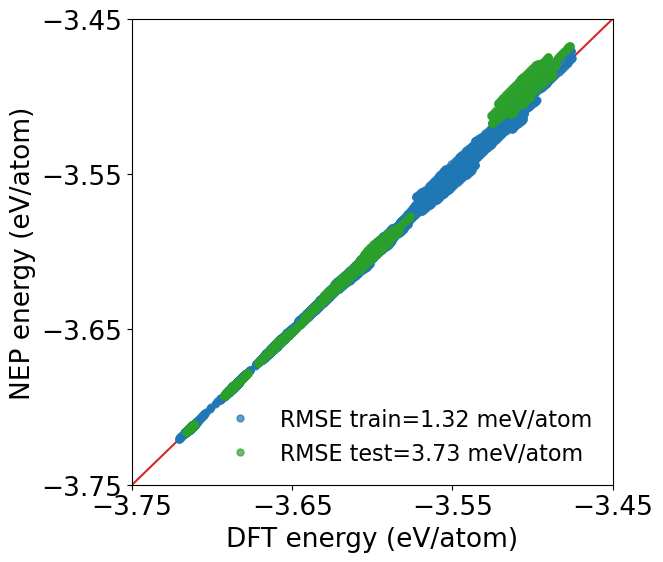

In [4]:
# Set up the plot outside the loop to ensure all data is plotted on the same axes
fig, ax = plt.subplots(figsize=(7, 6))

# Construct the file path
folderPath_train = os.path.join(os.getcwd(), folderName, 'energy_train.out')
folderPath_test = os.path.join(os.getcwd(), folderName, 'energy_test.out')

# the last row and 4th column in the loss.out file
rmse_train = np.loadtxt(os.path.join(os.getcwd(), folderName, 'loss.out'))[-1, 4] * 10**3
rmse_test = np.loadtxt(os.path.join(os.getcwd(), folderName, 'loss.out'))[-1, 7] * 10**3
# round to 2 decimal places
rmse_train = round(rmse_train, 2)
rmse_test = round(rmse_test, 2)
print(f'RMSE train: {rmse_train} meV/atom')
print(f'RMSE test: {rmse_test} meV/atom')

if os.path.exists(folderPath_train):
    energy_train = np.loadtxt(folderPath_train)
    ax.plot(np.linspace(-3.75,-3.45), np.linspace(-3.75,-3.45), '-', color='tab:red')
    ax.plot(energy_train[:, 1], energy_train[:, 0], 'o', label=f'RMSE train={rmse_train} meV/atom', color='tab:blue', markersize=5, alpha=0.7)
else:
    print(f"Train data not yet available for {folderName}")


# Check if the file exists to handle cases where simulation data might not yet be available
if os.path.exists(folderPath_test):
    energy_test = np.loadtxt(folderPath_test)
    ax.plot(energy_test[:, 1], energy_test[:, 0], 'o', label=f'RMSE test={rmse_test} meV/atom', color='tab:green', markersize=5, alpha=0.7)
else:
    print(f"Test data not yet available for {folderName}")

# Set labels and legend
ax.set_xlabel('DFT energy (eV/atom)')
ax.set_ylabel('NEP energy (eV/atom)')
# set limit
ax.set_xlim(-3.75, -3.45)
ax.set_ylim(-3.75, -3.45)
# set ticks
ax.set_xticks(np.linspace(-3.75,-3.45,4))
ax.set_yticks(np.linspace(-3.75,-3.45,4))

# Place the legend outside of the plot
# legend box to be transparent
plt.legend(frameon=False, loc='lower right', fontsize=16)
plt.tight_layout()
# save the plot
plt.savefig(f'{folderName}/energy.png', dpi=300, bbox_inches='tight')

<>:22: SyntaxWarning: invalid escape sequence '\A'
<>:33: SyntaxWarning: invalid escape sequence '\A'
<>:52: SyntaxWarning: invalid escape sequence '\A'
<>:53: SyntaxWarning: invalid escape sequence '\A'
<>:22: SyntaxWarning: invalid escape sequence '\A'
<>:33: SyntaxWarning: invalid escape sequence '\A'
<>:52: SyntaxWarning: invalid escape sequence '\A'
<>:53: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_2156789/137507793.py:22: SyntaxWarning: invalid escape sequence '\A'
  ax.plot(force_train[:, j + 3], force_train[:, j], 'o', color='tab:blue', markersize=5, alpha=0.7, label=None if j != 0 else f'RMSE train={rmse_train} meV/$\AA$')
/tmp/ipykernel_2156789/137507793.py:33: SyntaxWarning: invalid escape sequence '\A'
  ax.plot(force_test[:, j + 3], force_test[:, j], 'o', color='tab:green', markersize=5, alpha=0.7, label=None if j != 0 else f'RMSE test={rmse_test} meV/$\AA$')
/tmp/ipykernel_2156789/137507793.py:52: SyntaxWarning: invalid escape sequence '\A'
  train_handle 

RMSE train: 62.14 meV/$\AA$
RMSE test: 88.34 meV/$\AA$


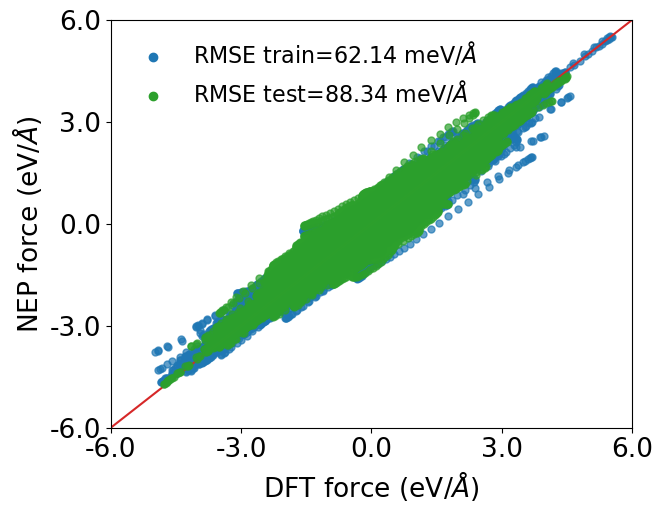

In [5]:
# Set up the plot outside the loop to ensure all data is plotted on the same axes
fig, ax = plt.subplots(figsize=(7, 5.5))

# Construct the file path
folderPath_train = os.path.join(os.getcwd(), folderName, 'force_train.out')
folderPath_test = os.path.join(os.getcwd(), folderName, 'force_test.out')

# the last row and 4th column in the loss.out file
rmse_train = np.loadtxt(os.path.join(os.getcwd(), folderName, 'loss.out'))[-1, 5] * 10**3
rmse_test = np.loadtxt(os.path.join(os.getcwd(), folderName, 'loss.out'))[-1, 8] * 10**3
# round to 2 decimal places
rmse_train = round(rmse_train, 2)
rmse_test = round(rmse_test, 2)
print(rf'RMSE train: {rmse_train} meV/$\AA$')
print(rf'RMSE test: {rmse_test} meV/$\AA$')

# Plotting train data if available
if os.path.exists(folderPath_train):
    force_train = np.loadtxt(folderPath_train)
    # Plot x, y, z components with separate labels and colors
    for j in range(3):  # Assuming columns are arranged [NEP_x, NEP_y, NEP_z, DFT_x, DFT_y, DFT_z]
        ax.plot(force_train[:, j + 3], force_train[:, j], 'o', color='tab:blue', markersize=5, alpha=0.7, label=None if j != 0 else f'RMSE train={rmse_train} meV/$\AA$')
    # Add a reference line
    ax.plot(np.linspace(-7, 7), np.linspace(-7, 7), '-', color='tab:red')
else:
    print(f"Data not yet available for {folderName}")

# Plotting test data if available
if os.path.exists(folderPath_test):
    force_test = np.loadtxt(folderPath_test)
    # Plot x, y, z components with separate labels and colors
    for j in range(3):  # Assuming columns are arranged [NEP_x, NEP_y, NEP_z, DFT_x, DFT_y, DFT_z]
        ax.plot(force_test[:, j + 3], force_test[:, j], 'o', color='tab:green', markersize=5, alpha=0.7, label=None if j != 0 else f'RMSE test={rmse_test} meV/$\AA$')
else:
    print(f"Data not yet available for {folderName}")

# Set labels and legend
ax.set_xlabel(r'DFT force (eV/$\AA$)')
ax.set_ylabel(r'NEP force (eV/$\AA$)')
# set limit
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
# set ticks to decimal places
ax.set_xticks(np.linspace(-6,6,5))
ax.set_yticks(np.linspace(-6,6,5))

# Format the tick labels to show one decimal place
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1f}'))

# Creating custom legend handles
train_handle = ax.scatter([], [], color='tab:blue', marker='o', label=f'RMSE train={rmse_train} meV/$\AA$')
test_handle = ax.scatter([], [], color='tab:green', marker='o', label=f'RMSE test={rmse_test} meV/$\AA$')

# Place the custom legend outside of the plot
ax.legend(handles=[train_handle, test_handle], loc='upper left', fontsize=16, frameon=False)
plt.tight_layout()
# save the plot
plt.savefig(f'{folderName}/force.png', dpi=300, bbox_inches='tight')

RMSE train: 7.83 meV/atom
RMSE test: 10.49 meV/atom


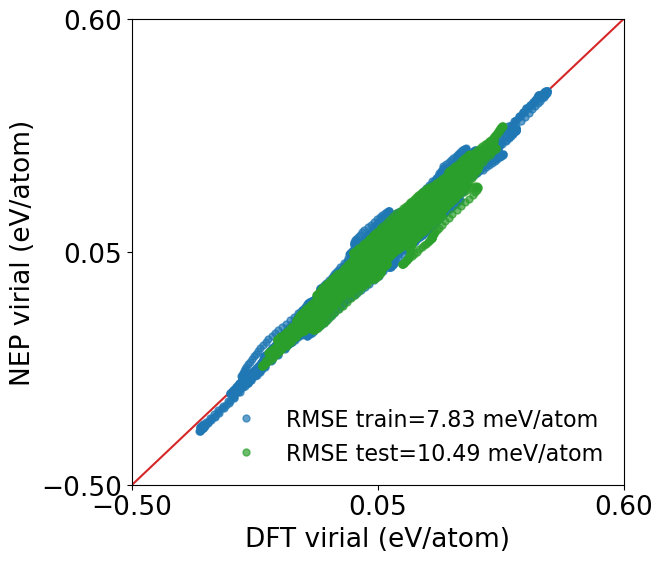

In [6]:
# Set up the plot outside the loop to ensure all data is plotted on the same axes
fig, ax = plt.subplots(figsize=(7, 6))

# Construct the file path
folderPath_train = os.path.join(os.getcwd(), folderName, 'virial_train.out')
folderPath_test = os.path.join(os.getcwd(), folderName, 'virial_test.out')

# the last row and 4th column in the loss.out file
rmse_train = np.loadtxt(os.path.join(os.getcwd(), folderName, 'loss.out'))[-1, 6] * 10**3
rmse_test = np.loadtxt(os.path.join(os.getcwd(), folderName, 'loss.out'))[-1, 9] * 10**3
# round off to 2 decimal places
rmse_train = round(rmse_train, 2)
rmse_test = round(rmse_test, 2)
print(f'RMSE train: {rmse_train} meV/atom')
print(f'RMSE test: {rmse_test} meV/atom')

if os.path.exists(folderPath_train):
    virial_train = np.loadtxt(folderPath_train)
    ax.plot(np.linspace(-0.5,0.6), np.linspace(-0.5,0.6), '-', color='tab:red')
    ax.plot(virial_train[:, 1], virial_train[:, 0], 'o', label=f'RMSE train={rmse_train} meV/atom', color='tab:blue', markersize=5, alpha=0.7)
else:
    print(f"Train data not yet available for {folderName}")


# Check if the file exists to handle cases where simulation data might not yet be available
if os.path.exists(folderPath_test):
    virial_test = np.loadtxt(folderPath_test)
    ax.plot(virial_test[:, 1], virial_test[:, 0], 'o', label=f'RMSE test={rmse_test} meV/atom', color='tab:green', markersize=5, alpha=0.7)
else:
    print(f"Test data not yet available for {folderName}")

# Set labels and legend
ax.set_xlabel('DFT virial (eV/atom)')
ax.set_ylabel('NEP virial (eV/atom)')
# # set limit
ax.set_xlim(-0.5, 0.6)
ax.set_ylim(-0.5, 0.6)
# set ticks
ax.set_xticks(np.linspace(-0.5,0.6,3))
ax.set_yticks(np.linspace(-0.5,0.6,3))

# Place the legend outside of the plot
ax.legend(fontsize=16, frameon=False)
plt.tight_layout()
# save the plot
plt.savefig(f'{folderName}/virial.png', dpi=300, bbox_inches='tight')